## IMPORTING LIBRARIES

In [2]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn

## MAKING TOY DATASET FOR CLASSIFICATION

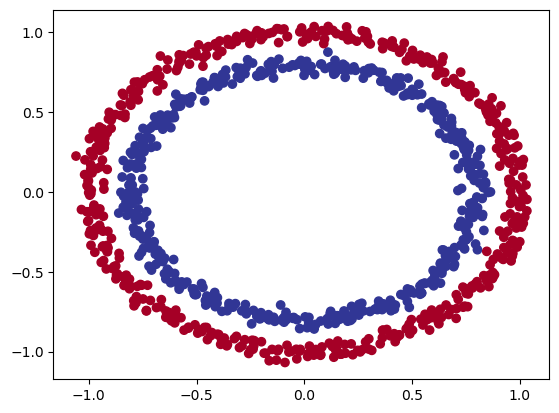

In [3]:
n_samples = 1000

X,y = make_circles(n_samples , noise = 0.03 , random_state = 42)

plt.scatter(X[:,0] , X[:,1] , c = y , cmap = plt.cm.RdYlBu)
plt.show()

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train , X_test ,y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

## MAKING CLASSIFICATION NN MODEL

In [5]:
# DEVICE AGNOSTIC CODE
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
# class CircleModel(nn.Module):
#     def __init__(self) -> None:
#         super().__init__()
#         self.layer1 = nn.Linear(in_features=X_train.shape[1] , out_features=5)
#         self.layer2 = nn.Linear(in_features=5 , out_features=1)

#     def forward(self , x):
#         return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output
    
# model = CircleModel()

# model.to(device)

model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1] , out_features=5),
    nn.Linear(in_features=5 , out_features=1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [8]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model.parameters() , lr = 0.01)

def acc_fn(y_true , y_pred):
    correct = torch.eq(y_true , y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc 

## TRAINING LINEAR MODEL

In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train , X_test ,y_train , y_test = X_train.to(device) , X_test.to(device) ,y_train.to(device) , y_test.to(device)

epochs = 200

for epoch in range(epochs):
    # TRAINING LOOP

    model.train()

    # Forward pass
    y_logits = model(X_train).squeeze()

    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate Loss , Accuracy

    loss = loss_fn(y_logits , y_train)

    acc = acc_fn(y_train , y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # TESTING LOOP
    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss and accuracy

        test_loss = loss_fn(test_logits , y_test)

        test_acc = acc_fn(y_test , test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc:{acc:.2f}% | Test Loss: {test_loss:.5f} , Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 10 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 20 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 30 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 40 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 50 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 60 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 70 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 80 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 90 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 100 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 110 | Loss: 0.69298 , Acc:51.00% | Test Loss: 0.69468 , Test Acc: 46.00%
Epoch: 120 | Loss: 0.69298 , Acc:51.00% | Test Loss

In [2]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("File already exists")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py" , "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary

File already exists


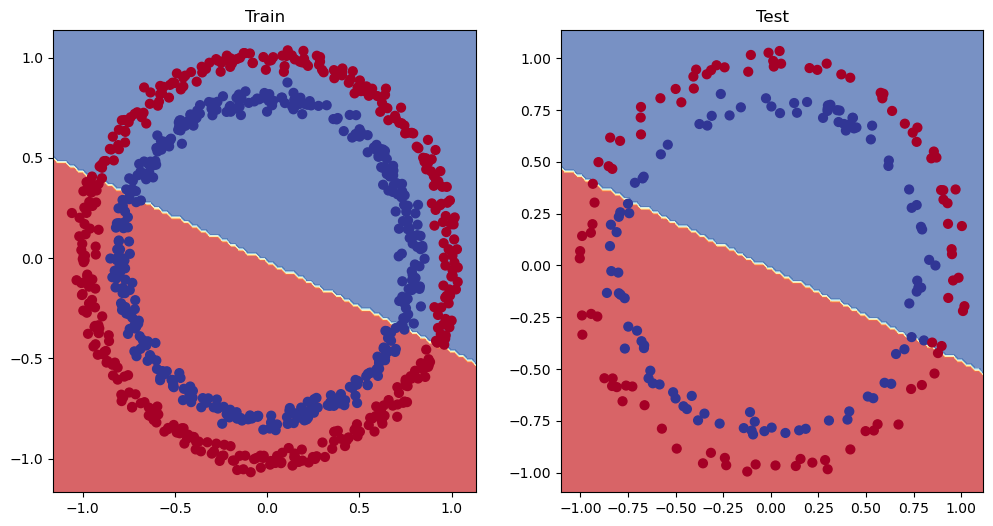

In [28]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model , X_test , y_test)

## BUILDING A NON_LINEAR MODEL

In [36]:
class CirlceModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features=X_train.shape[1] , out_features=10)
        self.layer2 = nn.Linear(in_features=10 , out_features=10)
        self.layer3 = nn.Linear(in_features=10 , out_features=1)

        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model2 = CirlceModel().to(device)

loss_fn2 = nn.BCEWithLogitsLoss()

optimizer2 = torch.optim.Adam(params = model2.parameters() , lr = 0.01)

## TRAINING NON-LINEAR MODEL

In [37]:

epochs2 = 200 

for epoch in range(epochs2):
    # TRAINING LOOP

    model2.train()

    # Forward pass
    y_logits2 = model2(X_train).squeeze()

    y_pred2 = torch.round(torch.sigmoid(y_logits2))

    # Calculate Loss , Accuracy

    loss2 = loss_fn2(y_logits2 , y_train)

    acc2 = acc_fn(y_train , y_pred2)

    optimizer2.zero_grad()

    loss2.backward()

    optimizer2.step()

    # TESTING LOOP
    model2.eval()

    with torch.inference_mode():
        test_logits2 = model2(X_test).squeeze()

        test_pred2 = torch.round(torch.sigmoid(test_logits2))

        # Calculate test loss and accuracy

        test_loss2 = loss_fn2(test_logits2 , y_test)

        test_acc2 = acc_fn(y_test , test_pred2)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss2:.5f} , Acc:{acc2:.2f}% | Test Loss: {test_loss2:.5f} , Test Acc: {test_acc2:.2f}%")

Epoch: 0 | Loss: 0.69603 , Acc:50.00% | Test Loss: 0.69424 , Test Acc: 50.00%
Epoch: 10 | Loss: 0.68352 , Acc:68.38% | Test Loss: 0.68611 , Test Acc: 66.50%
Epoch: 20 | Loss: 0.66651 , Acc:65.00% | Test Loss: 0.67309 , Test Acc: 59.50%
Epoch: 30 | Loss: 0.63370 , Acc:71.75% | Test Loss: 0.64368 , Test Acc: 67.50%
Epoch: 40 | Loss: 0.57059 , Acc:88.25% | Test Loss: 0.57426 , Test Acc: 85.00%
Epoch: 50 | Loss: 0.47259 , Acc:94.75% | Test Loss: 0.46964 , Test Acc: 96.00%
Epoch: 60 | Loss: 0.34835 , Acc:99.00% | Test Loss: 0.36876 , Test Acc: 98.50%
Epoch: 70 | Loss: 0.23081 , Acc:99.88% | Test Loss: 0.25856 , Test Acc: 100.00%
Epoch: 80 | Loss: 0.14036 , Acc:99.88% | Test Loss: 0.16273 , Test Acc: 100.00%
Epoch: 90 | Loss: 0.08431 , Acc:99.88% | Test Loss: 0.10837 , Test Acc: 100.00%
Epoch: 100 | Loss: 0.05293 , Acc:99.88% | Test Loss: 0.07745 , Test Acc: 100.00%
Epoch: 110 | Loss: 0.03555 , Acc:100.00% | Test Loss: 0.05932 , Test Acc: 100.00%
Epoch: 120 | Loss: 0.02559 , Acc:100.00% | Te

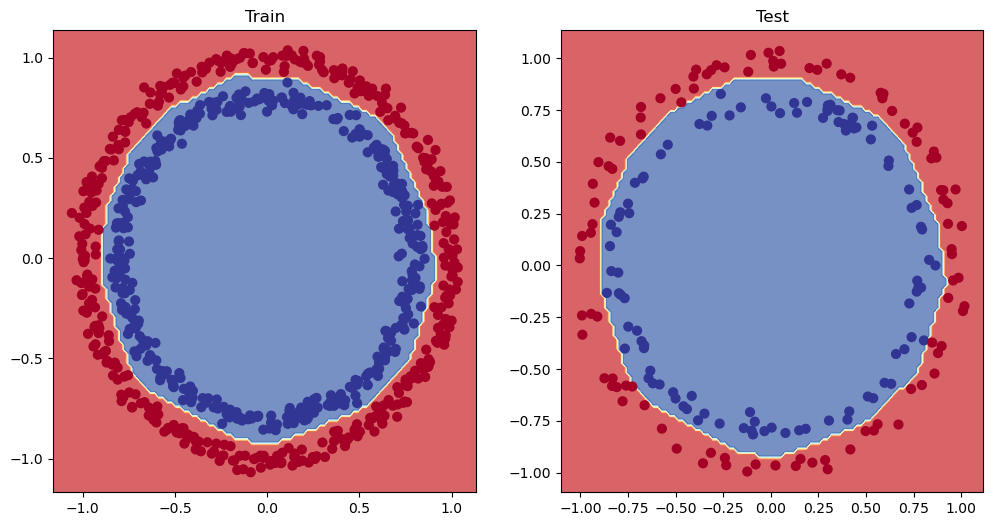

In [38]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model2, X_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model2 , X_test , y_test)